In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("hw7/review_us.csv")

In [3]:
data['pros_len'] = data.pros.apply(lambda x: len(x.split()))
data['cons_len'] = data.cons.apply(lambda x: len(x.split()))

In [4]:
data.head(2)

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,...,comp-benefit-stars,senior-mangemnet-stars,helpful-count,city,state,pop,lat,lon,pros_len,cons_len
0,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,...,5,3,2094,Mountain View,CA,75207,37.385574,-122.082050,155,398
1,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,...,5,4,949,New York,NY,8287238,40.730599,-73.986581,629,176


(array([3.8649e+04, 1.1580e+03, 2.4000e+02, 8.4000e+01, 4.4000e+01,
        1.8000e+01, 5.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+01]),
 array([1.0000e+00, 1.5020e+02, 2.9940e+02, 4.4860e+02, 5.9780e+02,
        7.4700e+02, 8.9620e+02, 1.0454e+03, 1.1946e+03, 1.3438e+03,
        1.4930e+03]),
 <a list of 10 Patch objects>)

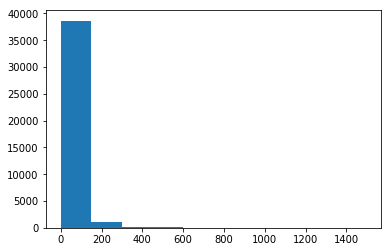

In [36]:
plt.hist(data["cons_len"])

# Histgram of length of pro comments

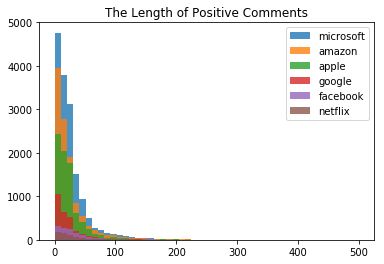

In [73]:
amazon = data[data["company"]=='amazon']['pros_len']
apple = data[data["company"]=='apple']['pros_len']
google = data[data["company"]=='google']['pros_len']
netflix = data[data["company"]=='netflix']['pros_len']
facebook = data[data["company"]=='facebook']['pros_len']
microsoft = data[data["company"]=='microsoft']['pros_len']

bins = np.linspace(0, 500, 50)

plt.hist(microsoft, bins, alpha=0.8, label='microsoft')

plt.hist(amazon, bins, alpha=0.8, label='amazon')
plt.hist(apple, bins, alpha=0.8, label='apple')
plt.hist(google, bins, alpha=0.8, label='google')
plt.hist(facebook, bins, alpha=0.8, label='facebook')
plt.hist(netflix, bins, alpha=0.8, label='netflix')

plt.legend(loc='upper right')
plt.title("The Length of Positive Comments")
plt.show()

# Histgram of length of cons comment

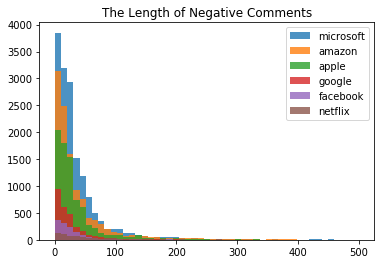

In [74]:
amazon = data[data["company"]=='amazon']['cons_len']
apple = data[data["company"]=='apple']['cons_len']
google = data[data["company"]=='google']['cons_len']
netflix = data[data["company"]=='netflix']['cons_len']
facebook = data[data["company"]=='facebook']['cons_len']
microsoft = data[data["company"]=='microsoft']['cons_len']

bins = np.linspace(0, 500, 50)

plt.hist(microsoft, bins, alpha=0.8, label='microsoft')

plt.hist(amazon, bins, alpha=0.8, label='amazon')
plt.hist(apple, bins, alpha=0.8, label='apple')
plt.hist(google, bins, alpha=0.8, label='google')
plt.hist(facebook, bins, alpha=0.8, label='facebook')
plt.hist(netflix, bins, alpha=0.8, label='netflix')

plt.legend(loc='upper right')
plt.title("The Length of Negative Comments")
plt.show()  

In [90]:
cadata = data[data.state==' CA']

In [110]:
len(cadata.groupby(["company","city"]).count())

265

# the most frequent words in comments

In [205]:
# data.groupby(data['company'])['pros'].transform(lambda x: ','.join(x))
a = data.groupby(['company'])['pros'].apply(','.join).reset_index()
a

,company,pros
0,amazon,"I've been at Amazon for a month now, and I've ..."
1,apple,"Competitive Pay, Great Benefits, Amazing Peopl..."
2,facebook,Context: I worked in operations - Very entrepr...
3,google,"1) Food, food, food. 15+ cafes on main campus ..."
4,microsoft,"1. If you love tech, this is a great place. No..."
5,netflix,Excellent Projects with Pros from throughout t...


In [181]:
from collections import Counter 
from nltk.corpus import stopwords
import nltk.corpus
import re

In [186]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('I')

In [261]:
a = data.groupby(['company'])['pros'].apply(','.join).reset_index()
b = data.groupby(['company'])['cons'].apply(','.join).reset_index()

In [264]:
comments = pd.merge(a,b)
comments

,company,pros,cons
0,amazon,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ..."
1,apple,"Competitive Pay, Great Benefits, Amazing Peopl...",None! I had one of the best times ever at this...
2,facebook,Context: I worked in operations - Very entrepr...,- Very entrepreneurial culture: There is no fo...
3,google,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...
4,microsoft,"1. If you love tech, this is a great place. No...",Brand on Your Resume: After many years of losi...
5,netflix,Excellent Projects with Pros from throughout t...,"Still setting the feel of the company,Work lif..."


In [265]:
# amazon is 0, apple
def fre_words(pro_or_con, company,i):
    company_words = comments[comments['company']== company][pro_or_con][i].split()
    company_words = [word.lower() for word in company_words]
    company_words = [word for word in company_words if word not in stopwords]
    company_words = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in company_words]
    company_words = [item for item in company_words if item != '']
    counts = Counter(company_words)
    company_list = sorted(counts.items(), key=lambda pair: pair[1], reverse=True)
    company_df = pd.DataFrame(company_list, columns=['word', 'count'], index=list(range(len(counts))))
    company_df['company_name'] = company
    return company_df

In [273]:
amazon_pros = fre_words('pros','amazon', 0)[:20]
apple_pros = fre_words('pros','apple', 1)[:20]
facebook_pros = fre_words('pros','facebook', 2)[:20]
google_pros = fre_words('pros','google', 3)[:20]
microsoft_pros = fre_words('pros','microsoft', 4)[:20]
netflix_pros = fre_words('pros','netflix', 5)[:20]


In [274]:
frames = [amazon_pros, apple_pros, facebook_pros, google_pros, microsoft_pros, netflix_pros]
result = pd.concat(frames)

In [275]:
result.to_csv("pros_words.csv", index=False)

# Heatmap

In [278]:
import pandas as pd 
import folium
from folium.plugins import HeatMap, HeatMapWithTime
from IPython import display

In [291]:
dataframe = data

text = 'your text here'

hmap = folium.Map( width=1000, height=800, zoom_start=3)
heat_data = [[row['lat'],row['lon']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(hmap)

hmap

# vadersentiment

In [293]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [294]:
sid = SentimentIntensityAnalyzer()
# tweet_dict['score'] = sid.polarity_scores(status.text)['compound']
# list_of_dict.append(tweet_dict)

In [297]:
sid.polarity_scores('I hate this')['compound']

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [348]:
data1 = data.copy()

In [349]:
# data1.summary[351]

In [350]:
no_summary_index = []
for i in range(len(data1)):
    if isinstance(data1.summary[i], str)==False:
        no_summary_index.append(i)

In [351]:
data1.drop(data1.index[no_summary_index], inplace=True)

In [352]:
data1['pros_score'] = data1['pros'].apply(lambda x: sid.polarity_scores(x)['compound'])
data1['cons_score'] = data1['cons'].apply(lambda x: sid.polarity_scores(x)['compound'])
data1['summary_score'] = data1['summary'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [354]:
data1.to_csv("sentiment.csv", index=False)

# boxplot

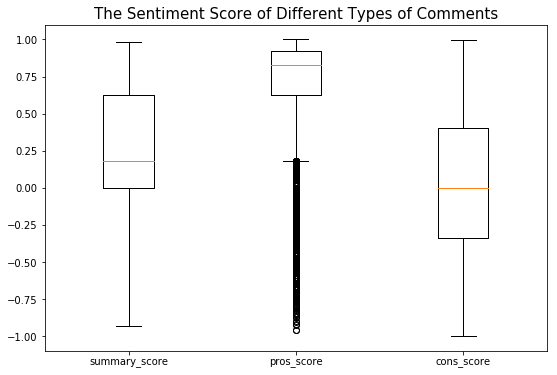

In [374]:
data_to_plot = [data1['summary_score'], data1['pros_score'], data1['cons_score']]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(data_to_plot)
# plt.boxplot(data_to_plot)
ax.set_xticklabels(['summary_score', 'pros_score', 'cons_score'])
plt.title('The Sentiment Score of Different Types of Comments', fontsize=15)
text = None

# scatterplot

In [385]:
data1.head(2)

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,...,city,state,pop,lat,lon,pros_len,cons_len,pros_score,cons_score,summary_score
0,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,...,Mountain View,CA,75207,37.385574,-122.082050,155,398,0.9732,0.2175,0.0000
1,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,...,New York,NY,8287238,40.730599,-73.986581,629,176,0.9988,0.3599,0.8689


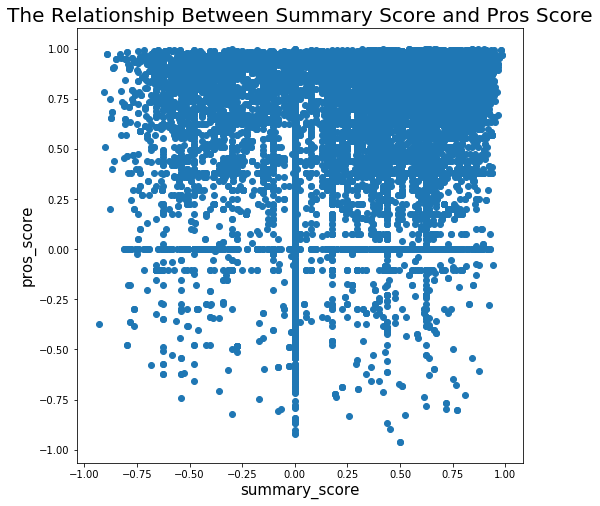

In [403]:
plt.figure(figsize=(8,8))
plt.scatter(data1['summary_score'], data1['pros_score'])

plt.xlabel('summary_score', fontsize = 15)
plt.ylabel('pros_score', fontsize = 15)
plt.title('The Relationship Between Summary Score and Pros Score', fontsize = 20)
text = None

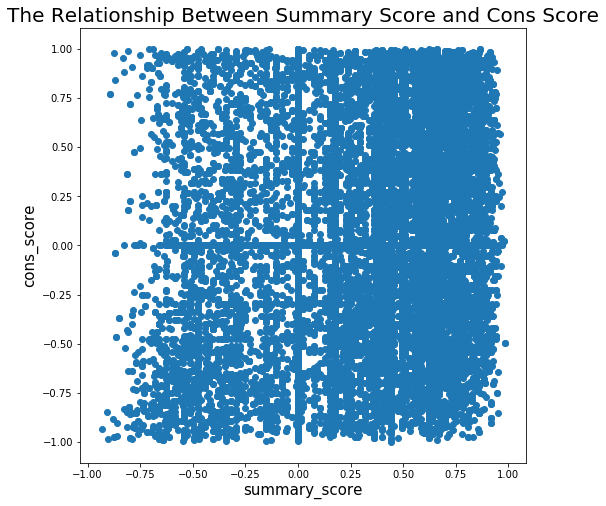

In [402]:
plt.figure(figsize=(8,8))
plt.scatter(data1['summary_score'], data1['cons_score'])
plt.xlabel('summary_score', fontsize=15)
plt.ylabel('cons_score', fontsize=15)
plt.title('The Relationship Between Summary Score and Cons Score', fontsize=20)
text = None

# connection plot

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd


In [406]:
df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()


,iata,airport,city,state,country,lat,long,cnt
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781


In [407]:
df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()


,start_lat,start_lon,end_lat,end_lon,airline,airport1,airport2,cnt
0,32.895951,-97.037200,35.040222,-106.609194,AA,DFW,ABQ,444
1,41.979595,-87.904464,30.194533,-97.669872,AA,ORD,AUS,166
2,32.895951,-97.037200,41.938874,-72.683228,AA,DFW,BDL,162
3,18.439417,-66.001833,41.938874,-72.683228,AA,SJU,BDL,56
4,32.895951,-97.037200,33.562943,-86.753550,AA,DFW,BHM,168


In [60]:
headquarter = pd.read_csv('headquarter.csv')

In [61]:
hq = [go.Scattergeo(
    locationmode = 'USA-states',
    lon = headquarter['lon'],
    lat = headquarter['lat'],
    hoverinfo = 'text',
    text = headquarter['headquarter'],
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    ))]

In [51]:
data2 = data.copy()

In [52]:
joined_data = pd.merge(data2, headquarter, how='left', left_on='company', right_on='headquarter')

In [53]:
joined_data2 = joined_data[['company','lat_x','lon_x','lat_y','lon_y']]

In [54]:
joined_data3 = joined_data2.groupby(joined_data2.columns.tolist()).size().reset_index().rename(columns={0:'cnt'})
joined_data3.cnt.max()

11228

In [55]:
# data1.drop(data1.index[no_summary_index], inplace=True)
joined_data3.drop(joined_data3.index[1127], inplace=True)
joined_data3.reset_index(drop=True, inplace=True)

In [57]:
paths = []
for i in range(len(joined_data3)):
    paths.append(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [joined_data3['lon_x'][i], joined_data3['lon_y'][i]],
            lat = [joined_data3['lat_x'][i], joined_data3['lat_y'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'red',
            ),
        opacity = float(joined_data3['cnt'][i]) / float(joined_data3['cnt'].max()),)
    )

In [63]:
layout = go.Layout(
#     title = go.layout.Title(
#         text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)'
#     ),
    title = 'The Connection Between Each Office to Its Headquarter',
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'north america',
        projection = go.layout.geo.Projection(type = 'azimuthal equal area'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig = go.Figure(data = paths + hq, layout = layout)
py.iplot(fig, filename = 'd3-flight-paths')